**Name:** Jared Miguel F. Roque <br>
**Course & Section:** CPE 313 - CPE32S8

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [57]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [59]:
x_train[0].shape

(28, 28)

Check the sample train data

In [60]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [61]:

y_train[333]

8

Check the actual image

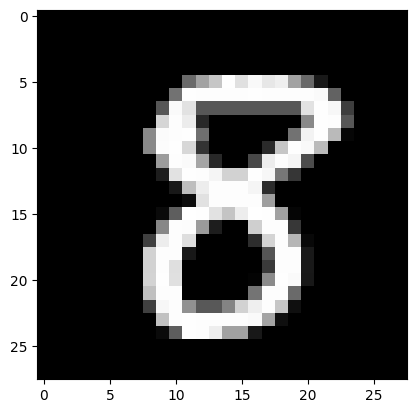

In [62]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [63]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [64]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [65]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [66]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [68]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.5151 - accuracy: 0.8453 - val_loss: 0.2108 - val_accuracy: 0.9380
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2517 - accuracy: 0.9262 - val_loss: 0.1540 - val_accuracy: 0.9553
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2009 - accuracy: 0.9396 - val_loss: 0.1290 - val_accuracy: 0.9614
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1727 - accuracy: 0.9491 - val_loss: 0.1205 - val_accuracy: 0.9648
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1555 - accuracy: 0.9528 - val_loss: 0.1073 - val_accuracy: 0.9674
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1416 - accuracy: 0.9573 - val_loss: 0.1016 - val_accuracy: 0.9699
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1323 - accuracy: 0.9599 - val_loss: 0.0985 - val_accuracy: 0.9716
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [69]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09911071509122849
Test accuracy: 0.9757999777793884


Interpret the result

- Based on the results of the test loss and test accuracy, the result of the test loss indicates that the model's predictions are close to the actual labels in the test dataset. This is because lower test loss values typically means better performance, so this result indicates good predictive capability. For the test accuracy result of approximately 97%, it means that the model correctly classified approximately 97% of the images in the test dataset. Indicating high accuracy rate and that the model performed very well.

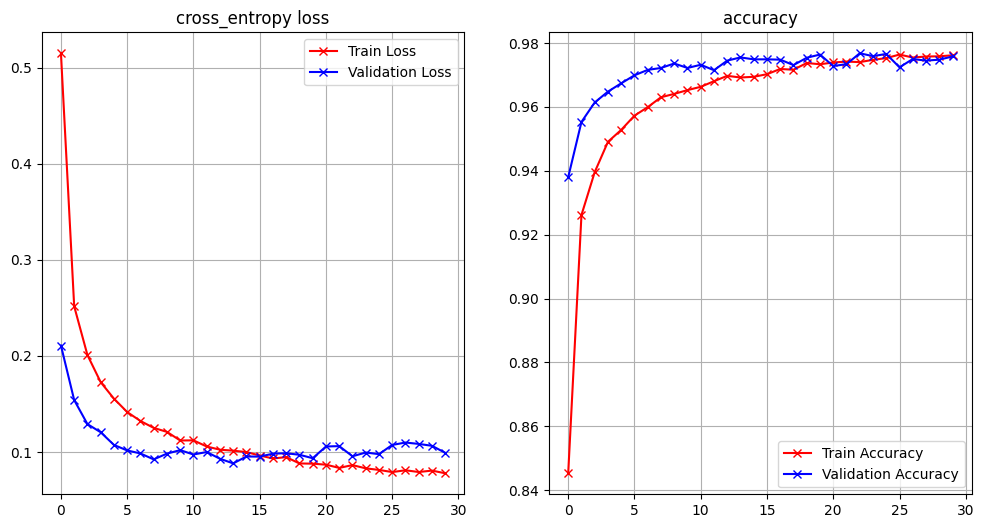

In [70]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

As both train loss and validation loss decreases and they are close to each other, it typically indicates good generalization. if the rain accuracy and validaion accuracy increases and they are close to each other, it typically indicates that the model is learning well.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers

In [72]:
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(784,)))  # First hidden layer with 400 units
model_1.add(Dropout(0.4))  # Dropout of 0.4
model_1.add(Dense(300, activation='relu'))  # Second hidden layer with 300 units
model_1.add(Dropout(0.4))  # Dropout of 0.4
model_1.add(Dense(10, activation='softmax'))  # Output layer with softmax activation

In [73]:
# Number of parameters of model_1
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 400)               314000    
                                                                 
 dropout_14 (Dropout)        (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               120300    
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Compile model_1
learning_rate = 0.001
model_1.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),
                metrics=['accuracy'])

In [75]:
# Train model_1
batch_size = 128
epochs = 20
history_1 = model_1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.3344 - accuracy: 0.8985 - val_loss: 0.1273 - val_accuracy: 0.9618
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1536 - accuracy: 0.9549 - val_loss: 0.0957 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1179 - accuracy: 0.9641 - val_loss: 0.0816 - val_accuracy: 0.9759
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1003 - accuracy: 0.9692 - val_loss: 0.0825 - val_accuracy: 0.9761
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0806 - val_accuracy: 0.9774
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0785 - accuracy: 0.9768 - val_loss: 0.0658 - val_accuracy: 0.9812
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0743 - accuracy: 0.9781 - val_loss: 0.0698 - val_accuracy: 0.9790

In [76]:
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)))  # First hidden layer with 400 units and L2 regularization
model_2.add(Dropout(0.4))  # Dropout of 0.4
model_2.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Second hidden layer with 300 units and L2 regularization
model_2.add(Dropout(0.4))  # Dropout of 0.4
model_2.add(Dense(10, activation='softmax'))  # Output layer with softmax activation

In [77]:
# Number of parameters of model_2
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               314000    
                                                                 
 dropout_16 (Dropout)        (None, 400)               0         
                                                                 
 dense_25 (Dense)            (None, 300)               120300    
                                                                 
 dropout_17 (Dropout)        (None, 300)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# Compile model_2
model_2.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(lr=learning_rate),  # Preferred optimizer
                metrics=['accuracy'])

In [80]:
# Train model_2
pref_epochs = 20
pref_learning_rate = 0.01
pref_batch_size = 128
history_2 = model_2.fit(x_train, y_train,
                        batch_size=pref_batch_size,
                        epochs=pref_epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.5341 - accuracy: 0.8558 - val_loss: 0.5781 - val_accuracy: 0.9170
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6198 - accuracy: 0.8979 - val_loss: 0.5098 - val_accuracy: 0.9271
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5542 - accuracy: 0.9092 - val_loss: 0.4696 - val_accuracy: 0.9363
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5178 - accuracy: 0.9152 - val_loss: 0.4321 - val_accuracy: 0.9411
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4962 - accuracy: 0.9183 - val_loss: 0.4086 - val_accuracy: 0.9456
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4780 - accuracy: 0.9222 - val_loss: 0.4065 - val_accuracy: 0.9412
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4685 - accuracy: 0.9229 - val_loss: 0.3862 - val_accuracy: 0.9465

In [81]:
# Accuracy and loss of model_1 and model_2
print("Model 1 - RMSprop optimizer:")
print("Training Loss:", history_1.history['loss'][-1])
print("Validation Loss:", history_1.history['val_loss'][-1])
print("Training Accuracy:", history_1.history['accuracy'][-1])
print("Validation Accuracy:", history_1.history['val_accuracy'][-1])

print("\nModel 2 - RMSprop optimizer with L2 regularization:")
print("Training Loss:", history_2.history['loss'][-1])
print("Validation Loss:", history_2.history['val_loss'][-1])
print("Training Accuracy:", history_2.history['accuracy'][-1])
print("Validation Accuracy:", history_2.history['val_accuracy'][-1])

Model 1 - RMSprop optimizer:
Training Loss: 0.03852077201008797
Validation Loss: 0.0705329105257988
Training Accuracy: 0.9881333112716675
Validation Accuracy: 0.983299970626831

Model 2 - RMSprop optimizer with L2 regularization:
Training Loss: 0.4180791676044464
Validation Loss: 0.36489635705947876
Training Accuracy: 0.928766667842865
Validation Accuracy: 0.9422000050544739


For Model 1:
- It achieved very low training loss of 0.0385, indicating that it fits the training data.
- The validation loss is slightly higher than the training loss with 0.0705, which is still relatively low, indicating that the model generalizes the unseen data pretty well.
- The training accuracy is very high at 98.81%, indicating that the model accurately predicted the training data.
- The validation accuracy is also high at 98.33%, also indicating that the model performed well on unseed validation data.

For Model 2:
- It achieved higher training loss at 0.4181 compared to Model 1, indicating that the L2 regularization affected the weights more, resulting in a lesser fit compared to Model 1.
- The validation loss is also higher compared to Model 1 at 0.3649, indicating that Model 2 is less effective in generalizing unseen data than Model 1.
- The training accuracy of Model 2 is at 94.88 which is slightly lower compared to Model 1, indicating that the regularization affected the training data from fitting too closely.
- The validation accuracy of Model 2 is at 94.22% which is also lower compared to Model 1, which still indicates good performance on unseen validation data.

Overall, Model 1 without the use of regularization achieved slightly better performance in terms of both accuracy and loss on both the training and validation data compared to Model 2 with L2 regularization. Even though Model 2 is outperformed by Model 1, Model 2 still performed well and may also improve generalization of unseen data due to applying regularization which helps prevent data from overfitting.

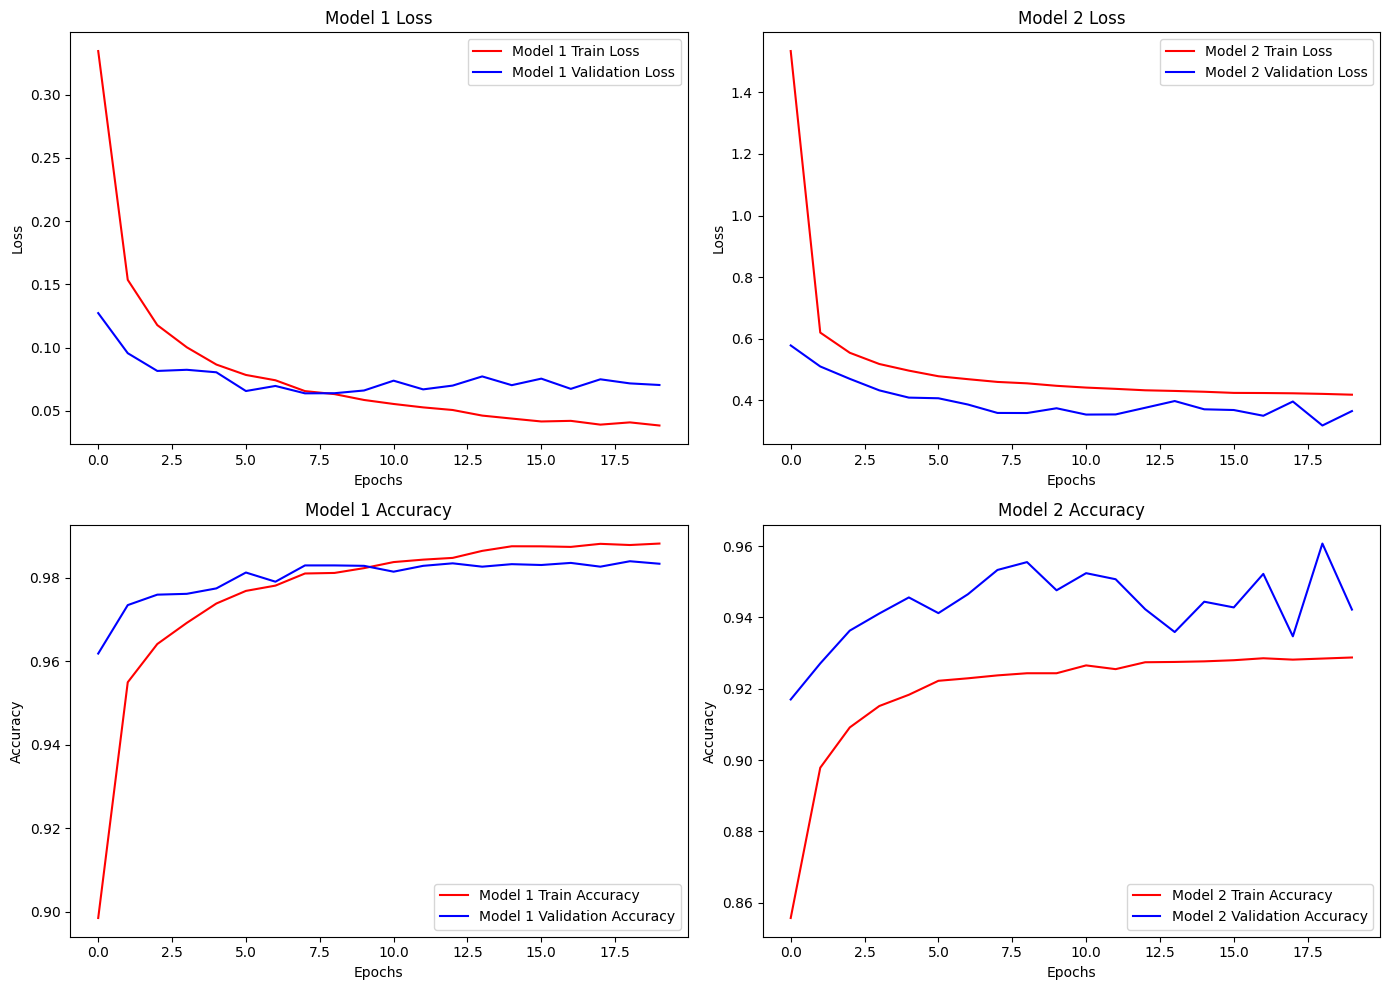

In [82]:
def plot_loss_accuracy(history_1, history_2):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Plot Model 1 Loss
    axs[0, 0].plot(history_1.history["loss"], label="Model 1 Train Loss", color='red')
    axs[0, 0].plot(history_1.history["val_loss"], label="Model 1 Validation Loss", color='blue')
    axs[0, 0].set_title('Model 1 Loss')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()

    # Plot Model 2 Loss
    axs[0, 1].plot(history_2.history["loss"], label="Model 2 Train Loss", color='red')
    axs[0, 1].plot(history_2.history["val_loss"], label="Model 2 Validation Loss", color='blue')
    axs[0, 1].set_title('Model 2 Loss')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend()

    # Plot Model 1 Accuracy
    axs[1, 0].plot(history_1.history["accuracy"], label="Model 1 Train Accuracy", color='red')
    axs[1, 0].plot(history_1.history["val_accuracy"], label="Model 1 Validation Accuracy", color='blue')
    axs[1, 0].set_title('Model 1 Accuracy')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].legend()

    # Plot Model 2 Accuracy
    axs[1, 1].plot(history_2.history["accuracy"], label="Model 2 Train Accuracy", color='red')
    axs[1, 1].plot(history_2.history["val_accuracy"], label="Model 2 Validation Accuracy", color='blue')
    axs[1, 1].set_title('Model 2 Accuracy')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(history_1, history_2)

For Model 1 Loss:
- Both the training loss smoothly decreases as epochs increase while the validation loss also decreases as epochs increase but not as smoothly as the training loss.
- The validation and training loss curve is close together, indicating that the model generalized well to unseen data.

For Model 2 Loss:
- Similar to Model 1, training loss smoothly curves as epochs increase while the validation loss not as smoothly as the training loss.
- The validation and training loss is very close together, indicating great generalization to unseen data.

For Model 1 Accuracy:
- The training accuracy increases smoothly as epochs increase while validation accuracy also increases but not as smooth as the training accuracy.
- The traning accuracy and validation accuracy is close together, indicating good generalization.

For Model 2 Accuracy:
- Similar to Model 1, the traning accuracy smoothly curves as epochs increase while validation accuracy fluctuates from increasing to decreasing as epochs increase.

Overall, Model 1 and Model 2 performed well, with high validation accuracy and relatively low validation loss.

#### **Conclusion**

In this activity, we explored building and training neural networks with regularization, visualizing models with regularization, and evaluating the result of models with regularization using the MNIST dataset. In the supplementary activity, we were tasked to create two models and compare their performances. Model 1 was built with two hidden layers, each with their own dropout layer to prevent overfitting. Model 1 achieved great results in terms of both training and validation accuracy, this is without using any regularization techniques. Model 2 on the other hand incorporated regularization inside the hidden layers to promote generalization and reducing the risk of overfitting using L2 regularization. Even though Model 1 achieved better performance than Model 2, Model 2 still performed well. In conclusion, both Model 1 and Model 2 achieved great results using the MNIST dataset.